## Student Performance Indicator
- To understand how the student's performance is affected by other factors like Gender, Ethnicity , Parents education and other parameters

Import Data and other required packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Dataset Information
- Gender: Male / Female
- Race/Ethnicity: Group A , Group B , Group C , Group D , Group E
- Parent's level of education: Bachelor's , College , Master's , High school
- Lunch: Standard , Free/reduced
- Test Prep Course: Completed or Not completed
- Math Score
- Reading Score
- Writing Score

Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check the number of unique values in each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Statistics of the dataset (Numerical columns only)

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [10]:
print("Categories in Gender variable:" , end = " ")
print(df['gender'].unique())

print("Categories in Race/Ethnicity variable:" , end = " ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable:" , end = " ")
print(df['parental level of education'].unique())

print("Categories in lunch variable:" , end = " ")
print(df['lunch'].unique())

print("Categories in test preparation course variable:" , end = " ")
print(df['test preparation course'].unique())

Categories in Gender variable: ['female' 'male']
Categories in Race/Ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test preparation course variable: ['none' 'completed']


In [11]:
# Define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} numerical features: {}".format(len(numerical_features) , numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features) ,categorical_features))



We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding Total score and Average score columns

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full_score = df[df['reading score'] == 100]['reading score'].count()
writing_full_score = df[df['writing score'] == 100]['writing score'].count()
math_full_score = df[df['math score'] == 100]['math score'].count()

print(f"Number of students with full score in reading: {reading_full_score}")
print(f"Number of students with full score in Writing: {writing_full_score}")
print(f"Number of students with full score in Math: {math_full_score}")


Number of students with full score in reading: 17
Number of students with full score in Writing: 14
Number of students with full score in Math: 7


In [15]:
reading_less_than_20_score = df[df['reading score'] < 20]['reading score'].count()
writing_less_than_20_score = df[df['writing score'] <  20]['writing score'].count()
math_less_than_20_score = df[df['math score'] < 20]['math score'].count()

print(f"Number of students with score less than 20 in reading: {reading_less_than_20_score}")
print(f"Number of students with score less than 20 in Writing: {writing_less_than_20_score}")
print(f"Number of students with score less than 20 in Math: {math_less_than_20_score}")

Number of students with score less than 20 in reading: 1
Number of students with score less than 20 in Writing: 3
Number of students with score less than 20 in Math: 4


Insights:
- Students have a bad performance in Math
- Students have a good performance in Reading

Exploring Data (Visualization)

Histogram and KDE

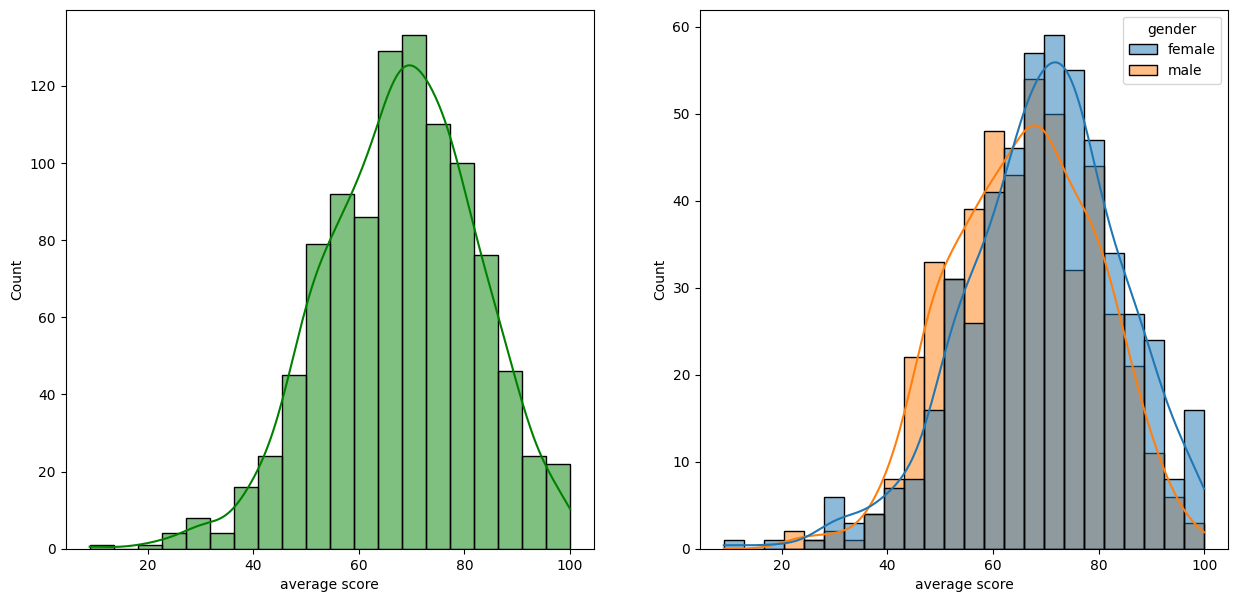

In [16]:
fig , axs = plt.subplots(1 , 2 , figsize = (15 , 7))
plt.subplot(121)
sns.histplot(data = df , x = 'average score' , bins = 20 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = df , x = 'average score' , kde = True , hue = 'gender')
plt.show()

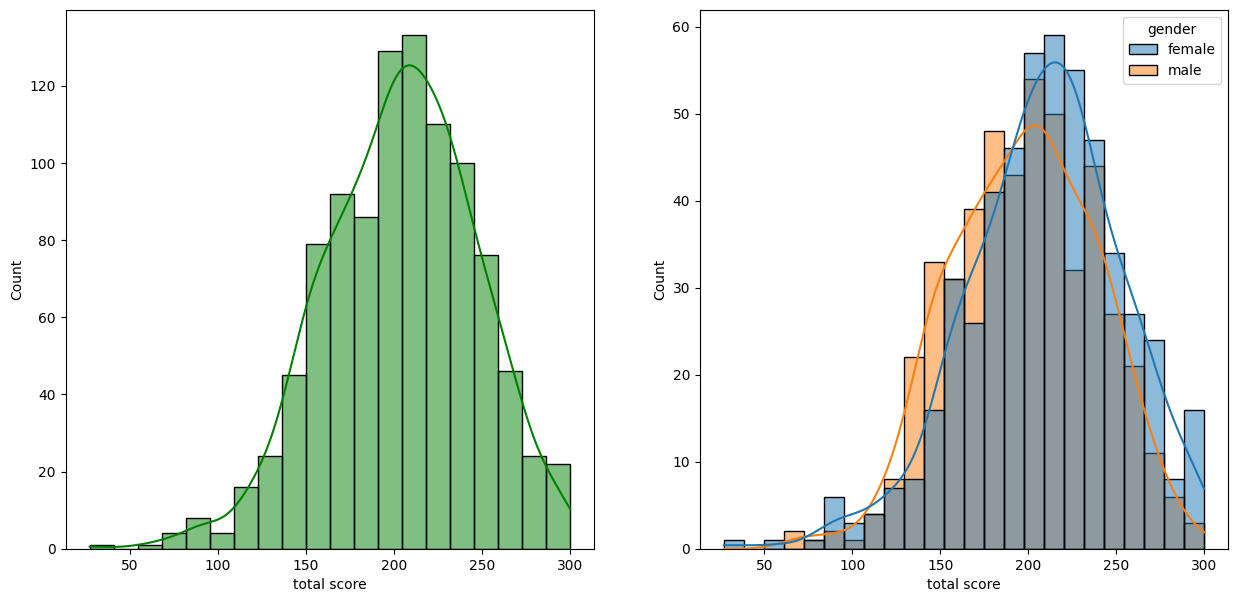

In [17]:
fig , axs = plt.subplots(1 , 2 , figsize = (15 , 7))
plt.subplot(121)
sns.histplot(data = df , x = 'total score' , bins = 20 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = df , x = 'total score' , kde = True , hue = 'gender')
plt.show()

Insights:
- Female students perform better than male students

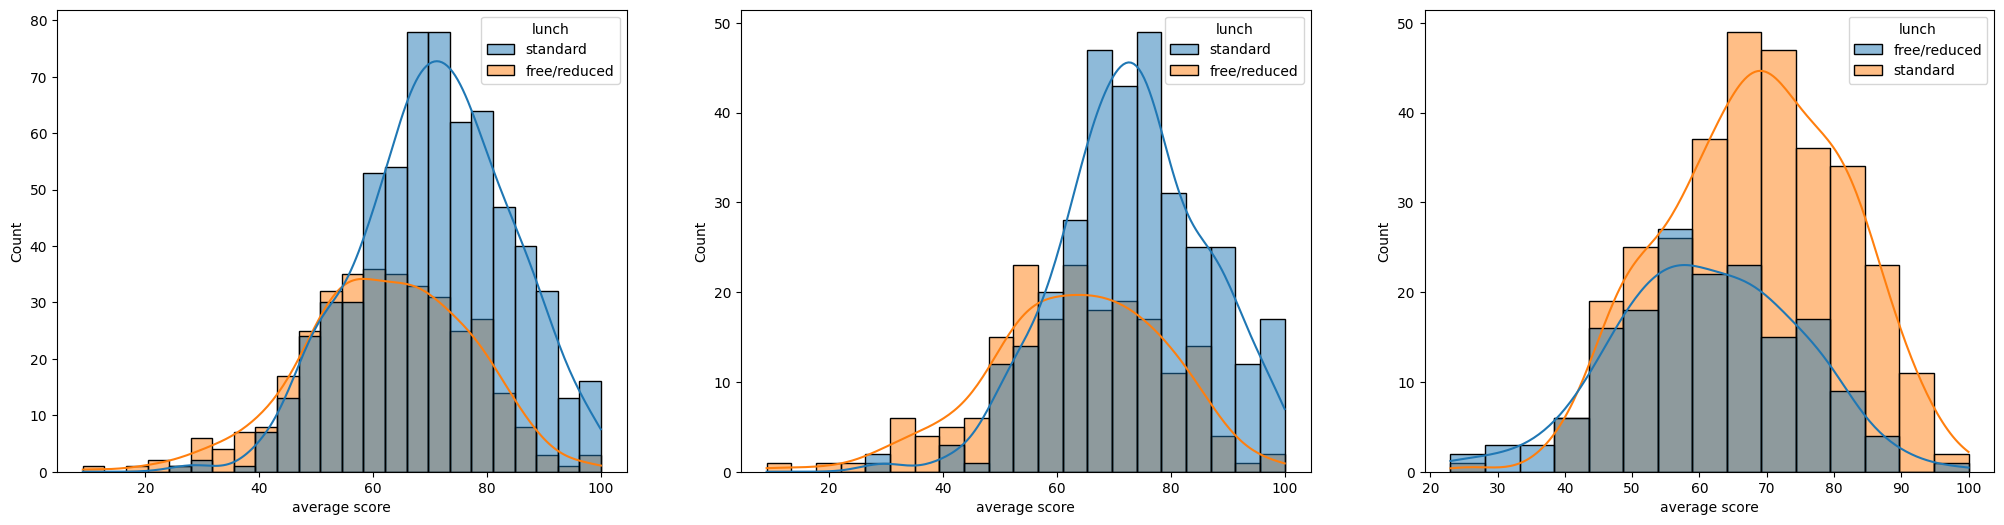

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df , x = 'average score' , kde = True , hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'] , x = 'average score' , kde = True , hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'] , x='average score' , kde = True , hue = 'lunch')
plt.show()

Insights:
- Standard lunch helps perform well in exams overall
- Standard lunch helps perform well in exams irrespective of the gender

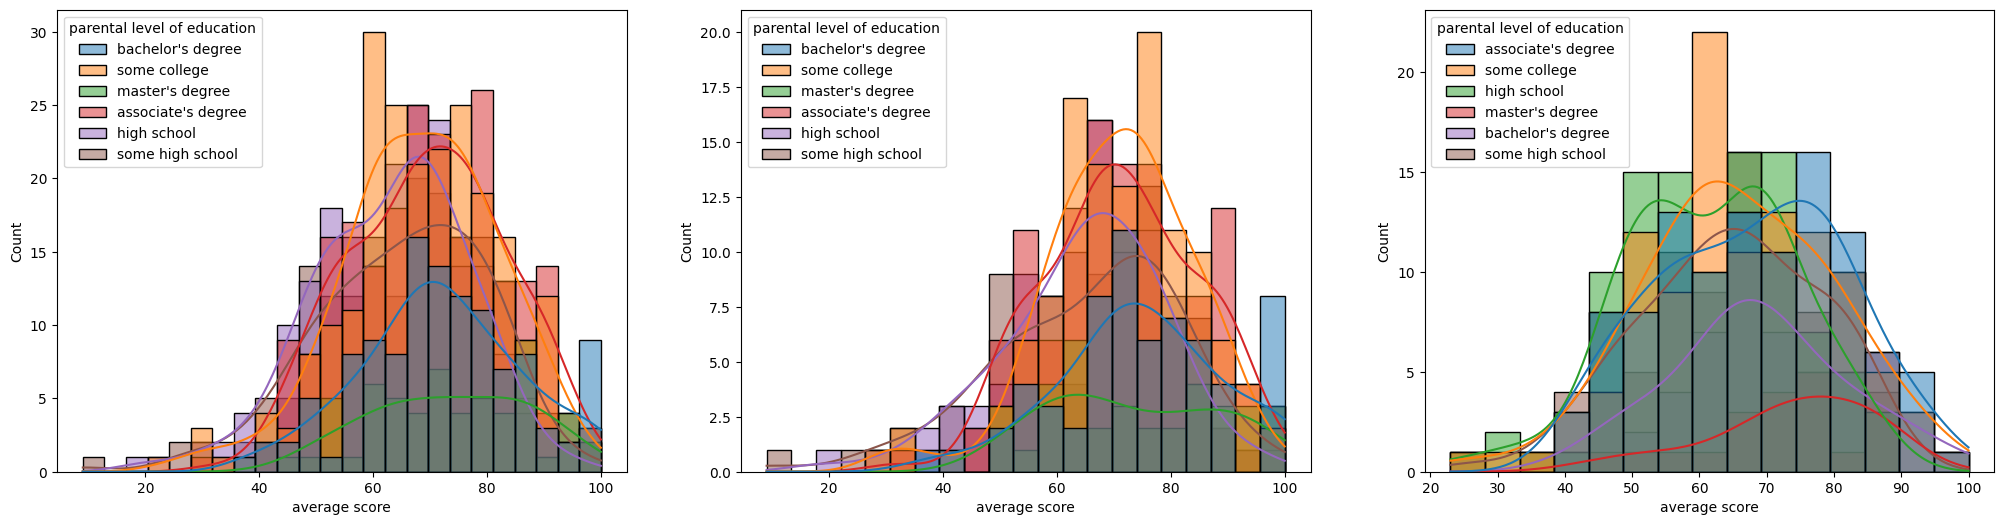

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df , x = 'average score' , kde = True , hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'] , x = 'average score' , kde = True , hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'] , x='average score' , kde = True , hue = 'parental level of education')
plt.show()

Insights:
- Parent's education has no effect on the performance

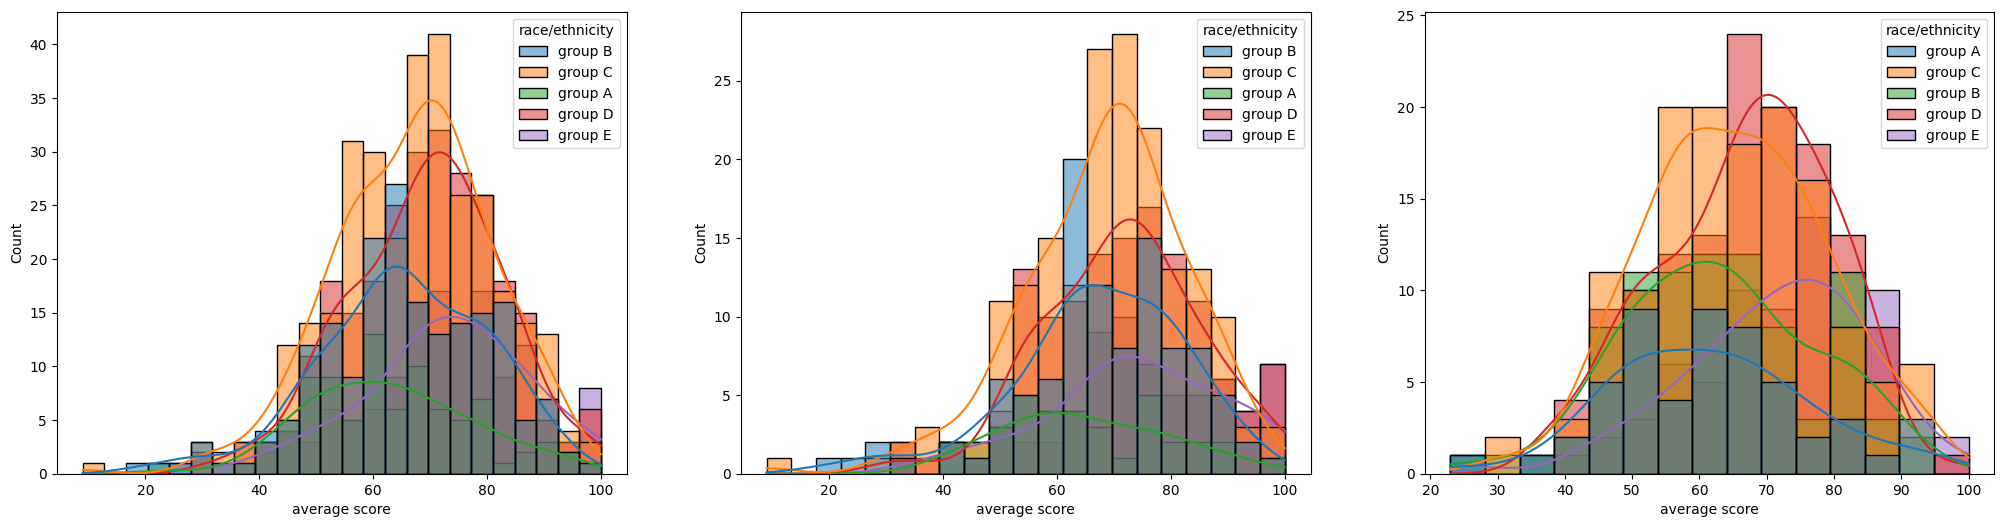

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df , x = 'average score' , kde = True , hue = 'race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'] , x = 'average score' , kde = True , hue = 'race/ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'] , x='average score' , kde = True , hue = 'race/ethnicity')
plt.show()

Insights:
- Students from group C have good overall performance, while group A performs poorly
- Students from group A and B perform poorly irrespective of their gender

Maximum score of students in all three subjects

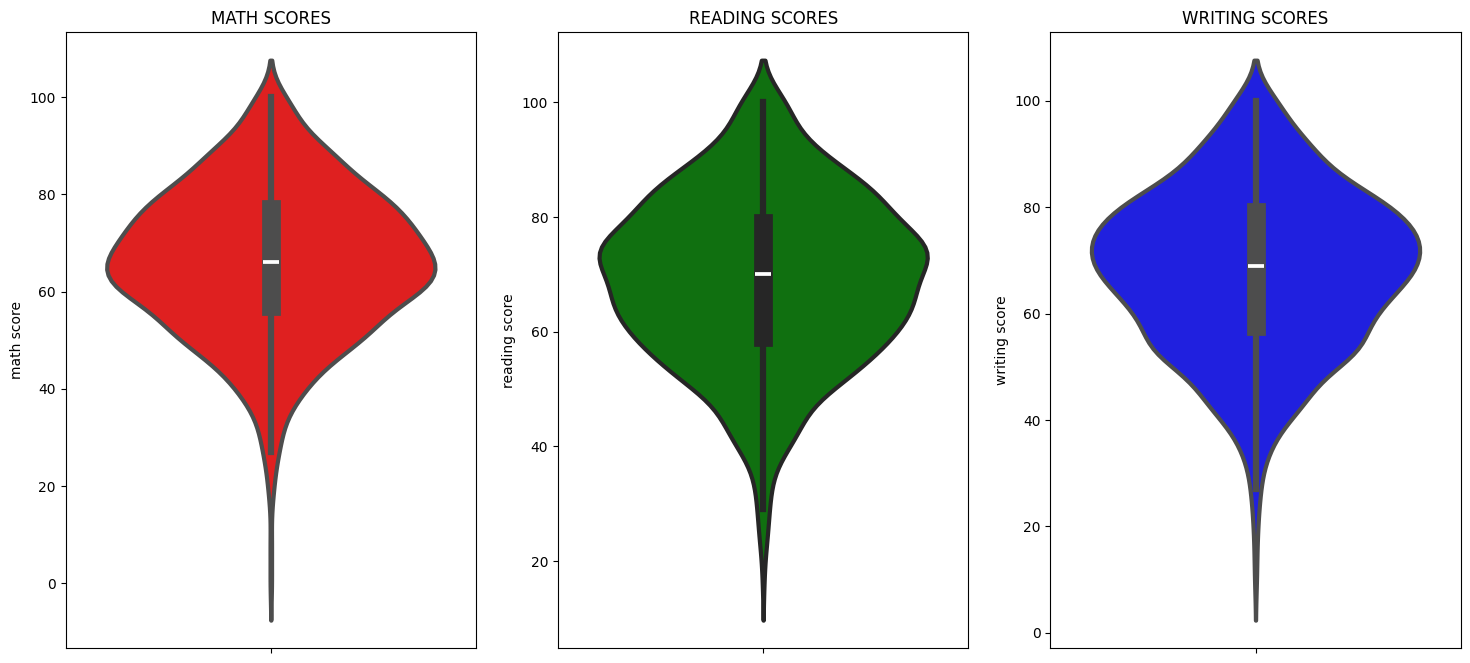

In [21]:
plt.figure(figsize = (18,8))
plt.subplot(1 , 3 , 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data = df , color = 'red' , linewidth = 3)
plt.subplot(1 , 3 , 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data = df , color = 'green' , linewidth = 3)
plt.subplot(1 , 3 , 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data = df , color = 'blue' , linewidth = 3)
plt.show()

Insights:
- Most students score between 60-80 in all the three subjects

Multivariate analysis using pieplot

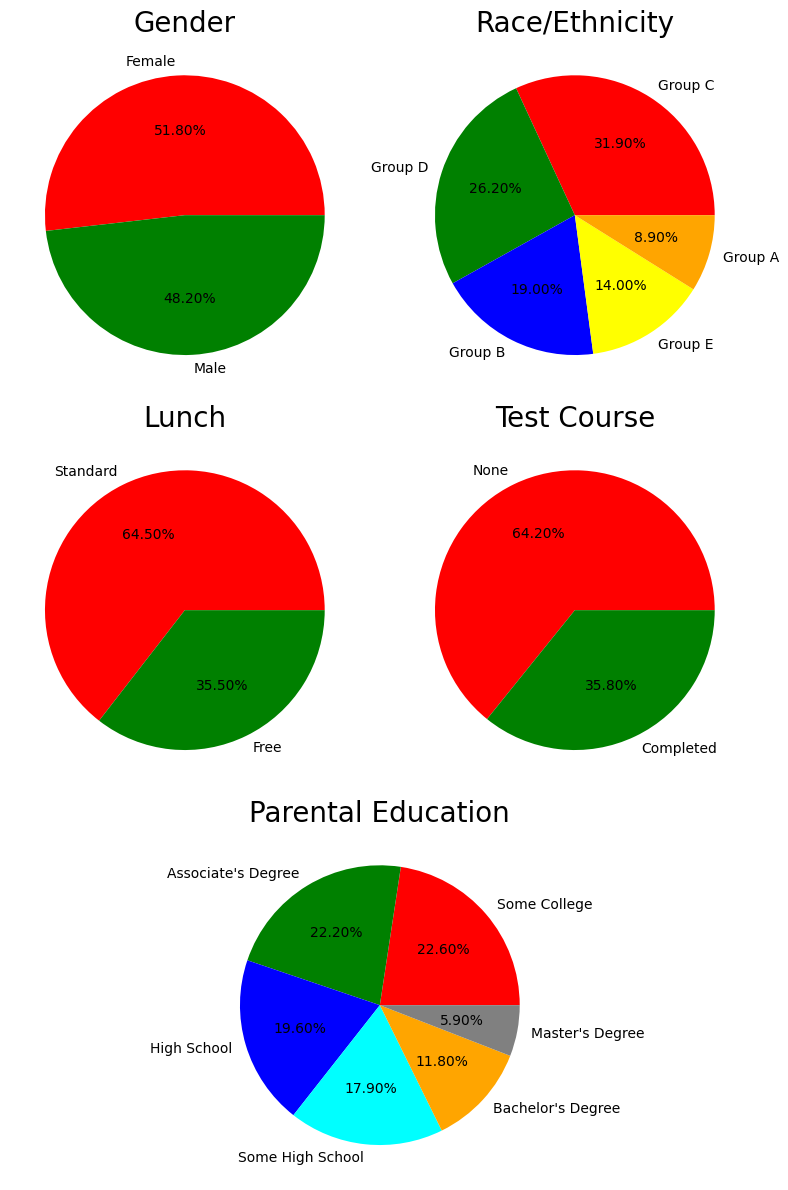

In [22]:
plt.rcParams['figure.figsize'] = (8,12)

plt.subplot(3 , 2 , 1)
size = df['gender'].value_counts()
labels = ['Female' , 'Male']
color = ['red' , 'green']

plt.pie(size , colors = color , labels = labels , autopct='%.2f%%')
plt.title('Gender' , fontsize = 20)
plt.axis('off')

plt.subplot(3 , 2 , 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C' , 'Group D' , 'Group B' , 'Group E' , 'Group A' ]
color = ['red' , 'green' , 'blue' , 'yellow' , 'orange']

plt.pie(size , colors = color , labels = labels , autopct='%.2f%%')
plt.title('Race/Ethnicity' , fontsize = 20)
plt.axis('off')

plt.subplot(3 , 2 , 3)
size = df['lunch'].value_counts()
labels = ['Standard' , 'Free' ]
color = ['red' , 'green']

plt.pie(size , colors = color , labels = labels , autopct='%.2f%%')
plt.title('Lunch' , fontsize = 20)
plt.axis('off')

plt.subplot(3 , 2 , 4)
size = df['test preparation course'].value_counts()
labels = ['None' , 'Completed' ]
color = ['red' , 'green']

plt.pie(size , colors = color , labels = labels , autopct='%.2f%%')
plt.title('Test Course' , fontsize = 20)
plt.axis('off')

plt.subplot(3 , 1 , 3)
size = df['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"]
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size , colors = color , labels = labels , autopct='%.2f%%')
plt.title('Parental Education' , fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


Insights:
- Male and female students are almost equal in number
- Group C contains the highest number of students
- Most students have standard lunch
- Number of students not enrolled in any Test preparation course are greater in number
- Number of students whose parent's education is "Some College" is greater followed closely by "Associate's Degree"

# Feature wise Visualization

### GENDER COLUMN
- How is the distribution?
- Does gender have any impact on a student's performance?

UNIVARIATE ANALYSIS (How is gender distributed?)

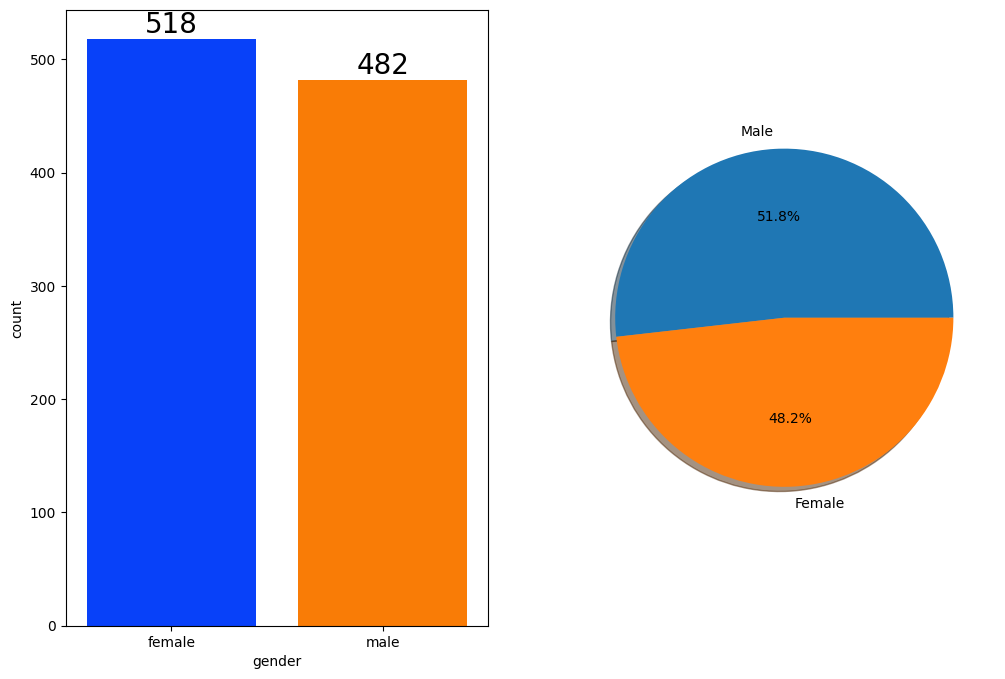

In [23]:
fig , ax = plt.subplots(1 , 2 , figsize = (12 , 8))
sns.countplot(x = df['gender'] , data = df , palette='bright' , ax = ax[0] , saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 20)

plt.pie(x = df['gender'].value_counts() , labels = ['Male' , 'Female']  , autopct='%1.1f%%' , shadow=True)
plt.show()

Insights
- Number of Female students are 518 and Number of male students are 482. Hence, the data is balanced


BIVARIATE ANALYSIS (Does gender have any impact on student's performance?)

In [24]:
gender_group = df.groupby('gender')

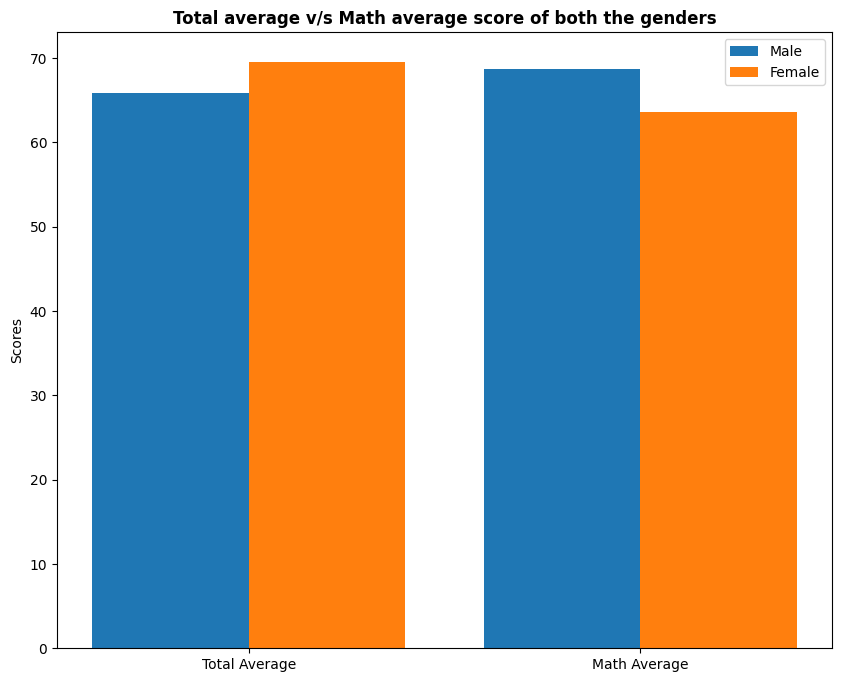

In [25]:
plt.figure(figsize = (10 , 8))

X = ['Total Average' , 'Math Average']

female_scores = [gender_group['average score'].mean()[0] , gender_group['math score'].mean()[0]]
male_scores = [gender_group['average score'].mean()[1] , gender_group['math score'].mean()[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2 , male_scores , 0.4 , label = 'Male')
plt.bar(X_axis + 0.2 , female_scores , 0.4 , label = 'Female')

plt.xticks(X_axis , X)
plt.ylabel("Scores")
plt.title("Total average v/s Math average score of both the genders" , fontweight = 'bold')
plt.legend()
plt.show()

Insights:
- Females have better average scores than males when considered in all subjects
- Males have higher math average scores when compared to females

## RACE/ETHNICITY COLUMN
- How is the distribution?
- Does Race/Ethnicity have any impact on a student's performance?

UNIVARIATE ANALYSIS (How does the Group wise distribution look?)

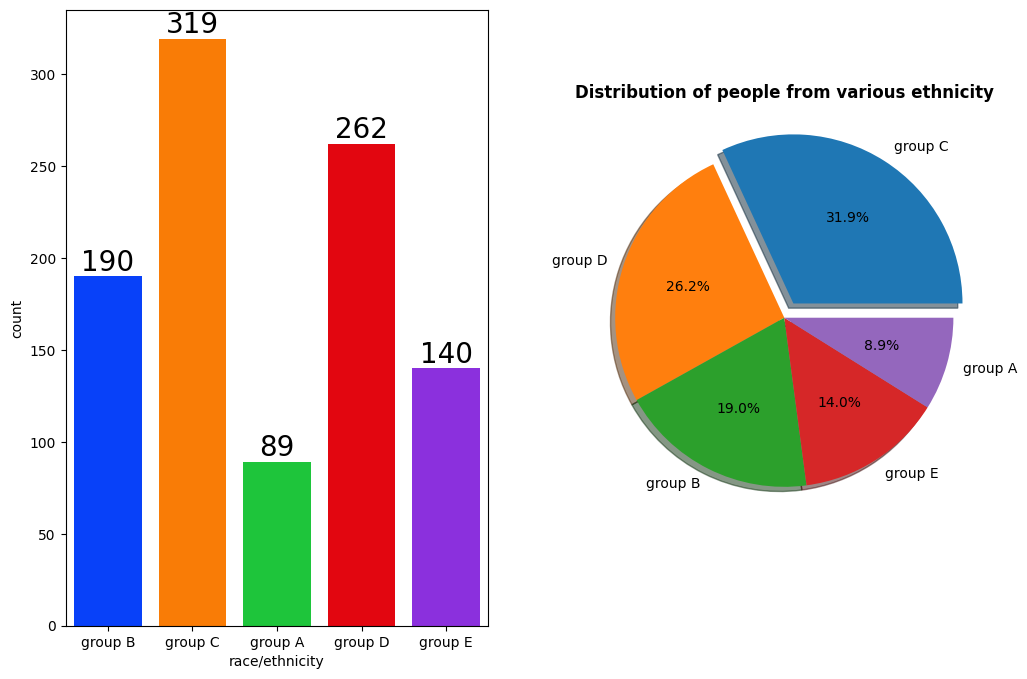

In [26]:
fig , ax = plt.subplots(1 , 2 , figsize = (12 , 8))
sns.countplot(x = df['race/ethnicity'] , data = df , palette='bright' , ax = ax[0] , saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 20)

plt.pie(x = df['race/ethnicity'].value_counts() , labels = df['race/ethnicity'].value_counts().index  , autopct='%1.1f%%' , shadow=True , explode=[0.1,0,0,0,0])
plt.title("Distribution of people from various ethnicity" , fontweight = 'bold')
plt.show()

Insights:
- Most students belong to group C / group D
- Very few belong to group A

BIVARIATE ANALYSIS (Does ethnicity have any impact on student's performace?)

In [27]:
race_group = df.groupby('race/ethnicity')

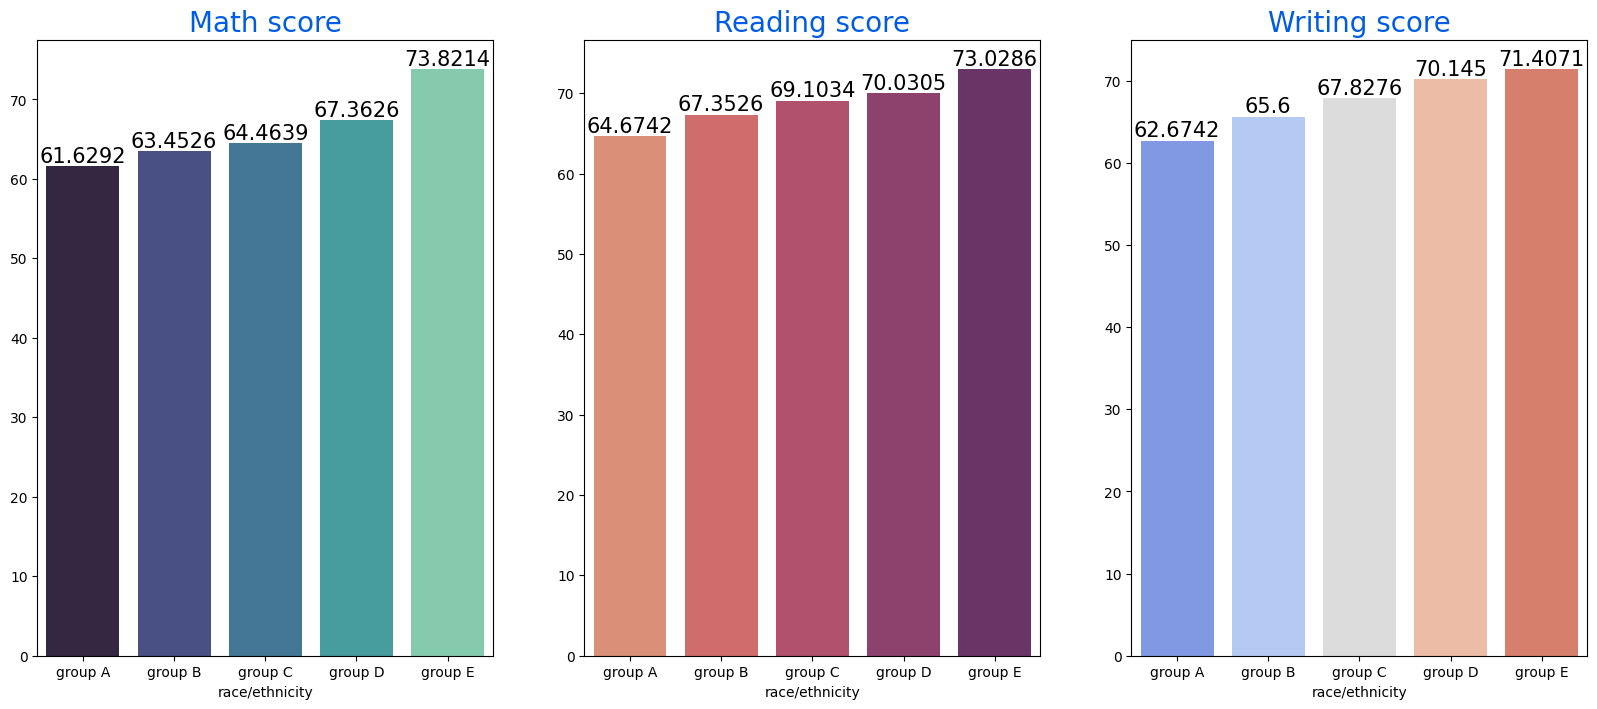

In [28]:
fig , ax = plt.subplots(1 , 3 , figsize = (20 , 8))

sns.barplot(x= race_group['math score'].mean().index , y = race_group['math score'].mean().values , palette= 'mako' , ax= ax[0] , )
ax[0].set_title('Math score' , color = '#005ce6' , size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 15)

sns.barplot(x= race_group['reading score'].mean().index , y = race_group['reading score'].mean().values , palette= 'flare' , ax= ax[1])
ax[1].set_title('Reading score' , color = '#005ce6' , size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container , color = 'black' , size = 15)

sns.barplot(x= race_group['writing score'].mean().index , y = race_group['writing score'].mean().values , palette= 'coolwarm' , ax= ax[2])
ax[2].set_title('Writing score' , color = '#005ce6' , size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container , color = 'black' , size = 15)


Insights:
- Group E students have highest average score
- Group A students have lowest average score

## PARENTAL LEVEL OF EDUCATION COLUMN
- What is the educational background of a student's parent?
- Does Parental education have any impact on a student's performance?

UNIVARIATE ANALYSIS (What are parent's educational background?)

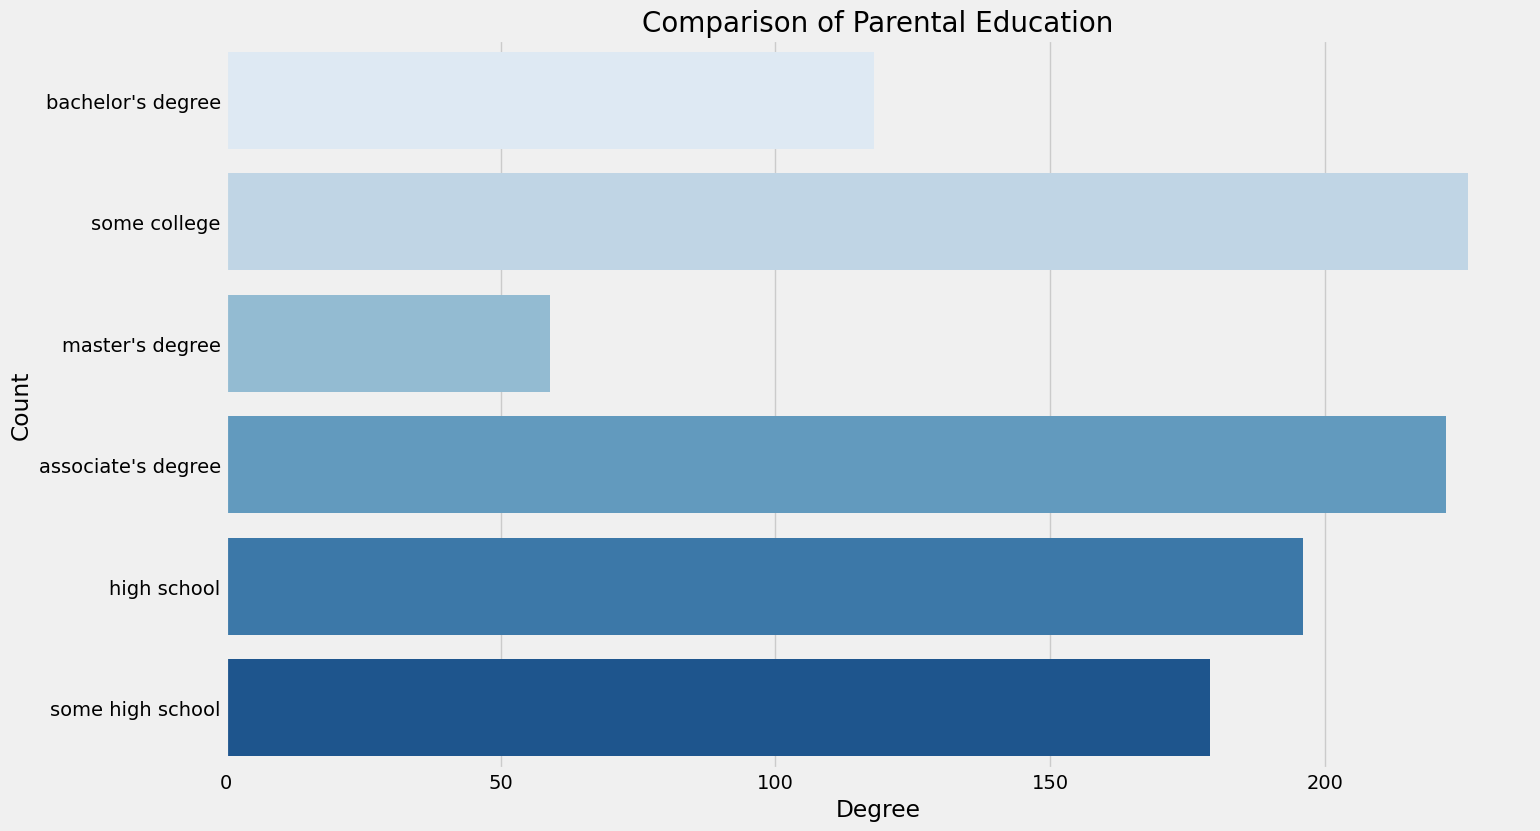

In [29]:
plt.rcParams['figure.figsize'] = (15 , 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'] , palette= 'Blues')
plt.title('Comparison of Parental Education' , fontweight = 30 , fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Insights:
- Most of the parents have some college degree
- A few have master's degree

BIVARIATE ANALYSIS (Does parent's education have any impact on student's performace?)

In [30]:
df.groupby('parental level of education').mean(numeric_only= True)

,math score,reading score,writing score,total score,average score
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


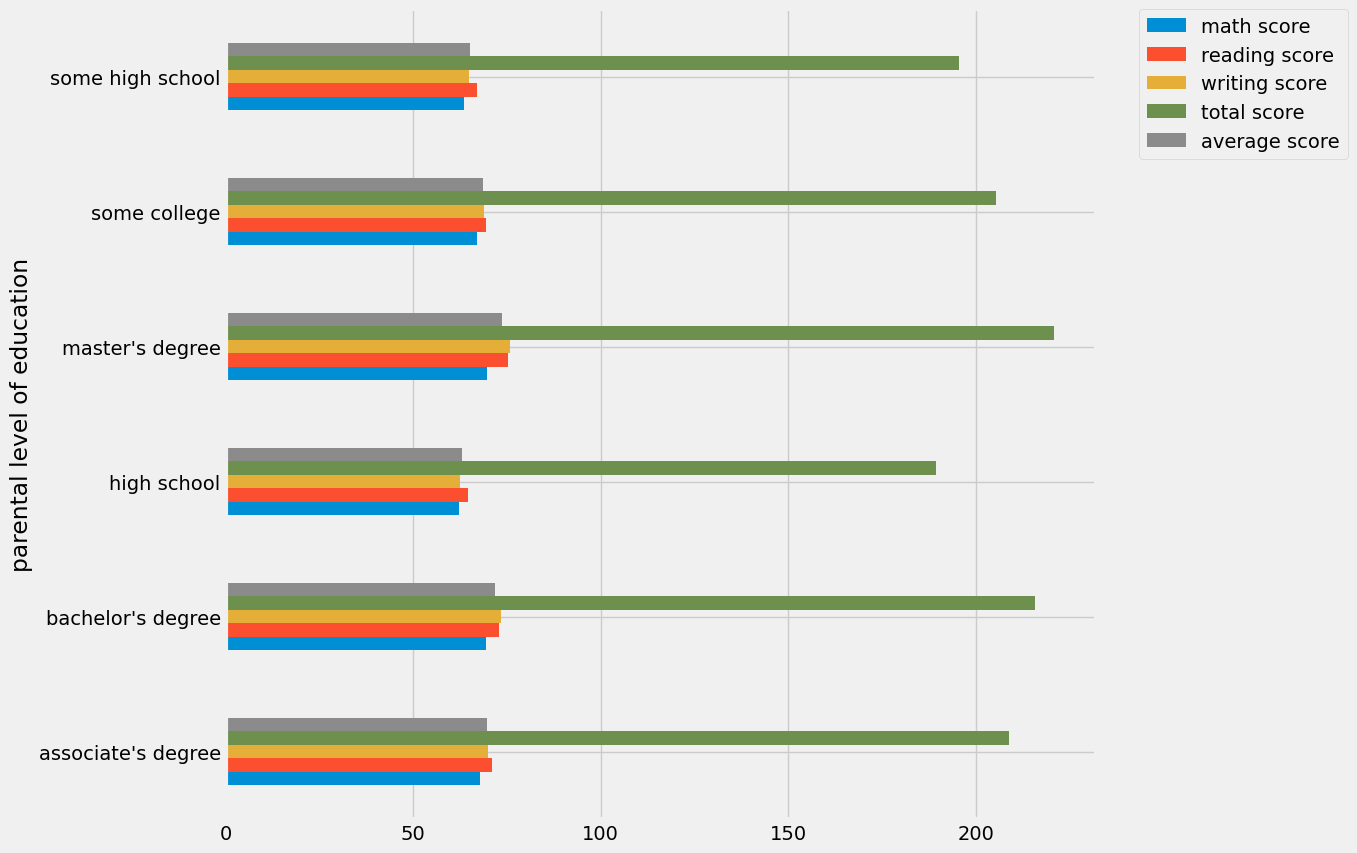

In [31]:
df.groupby('parental level of education').mean(numeric_only= True).plot(kind = 'barh' , figsize=(10 , 10))
plt.legend(bbox_to_anchor = (1.05 , 1) , loc = 2 , borderaxespad = 0.)
plt.show()

Insights:
- The scores of student whose parents possess master's degree are higher than others

### LUNCH COLUMN
- What type of lunch is common among students?
- What is the effect of lunch on test scores?

UNIVARIATE ANALYSIS (What type of lunch is most common among students)

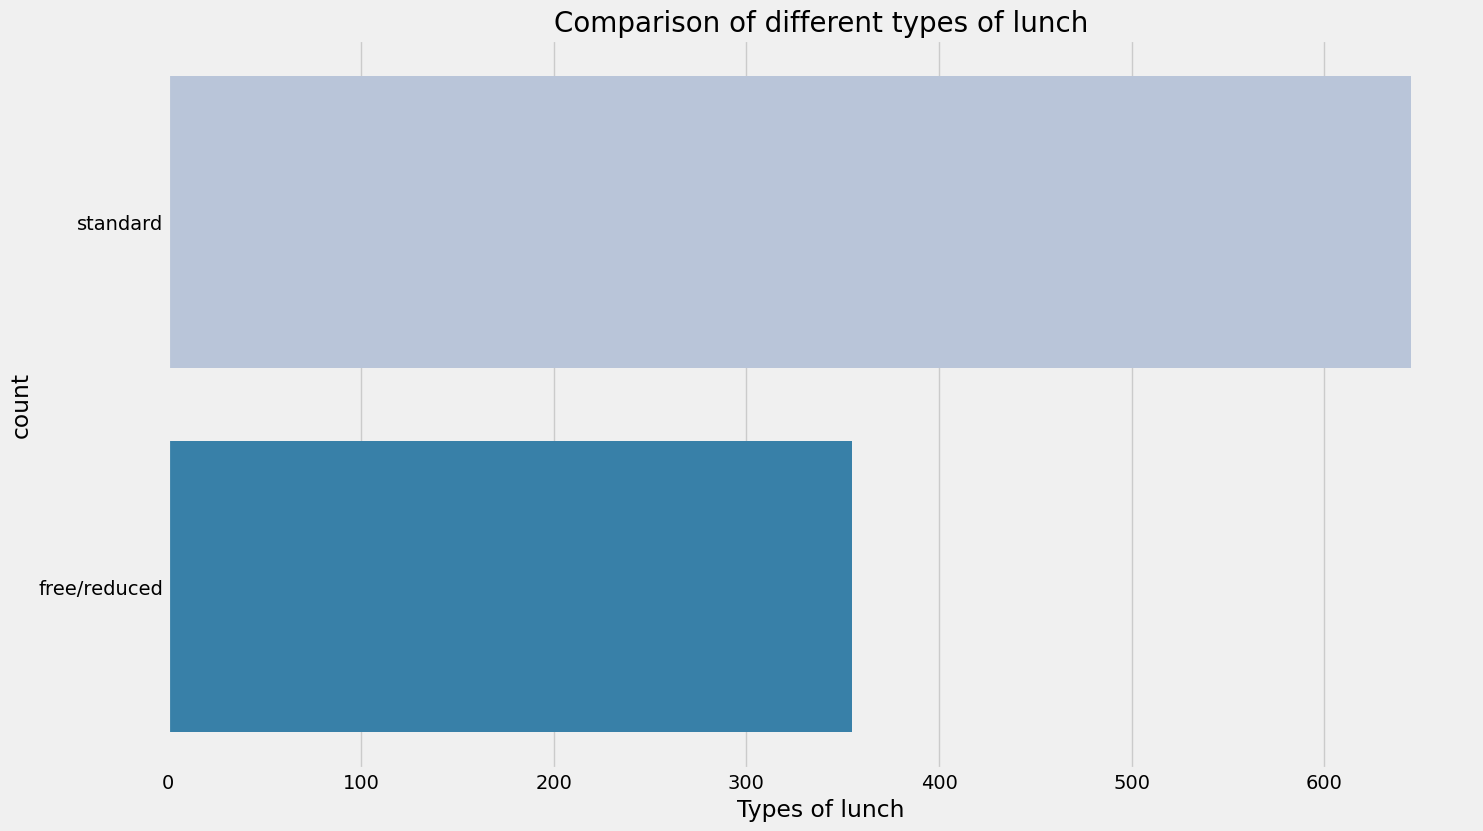

In [32]:
plt.rcParams['figure.figsize'] = (15 , 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'] , palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30 , fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('count')
plt.show()

Insights:
- More students consume standard lunch than free lunch

BIVARIATE ANALYSIS (Does lunch type have any impact on student's performance ?)

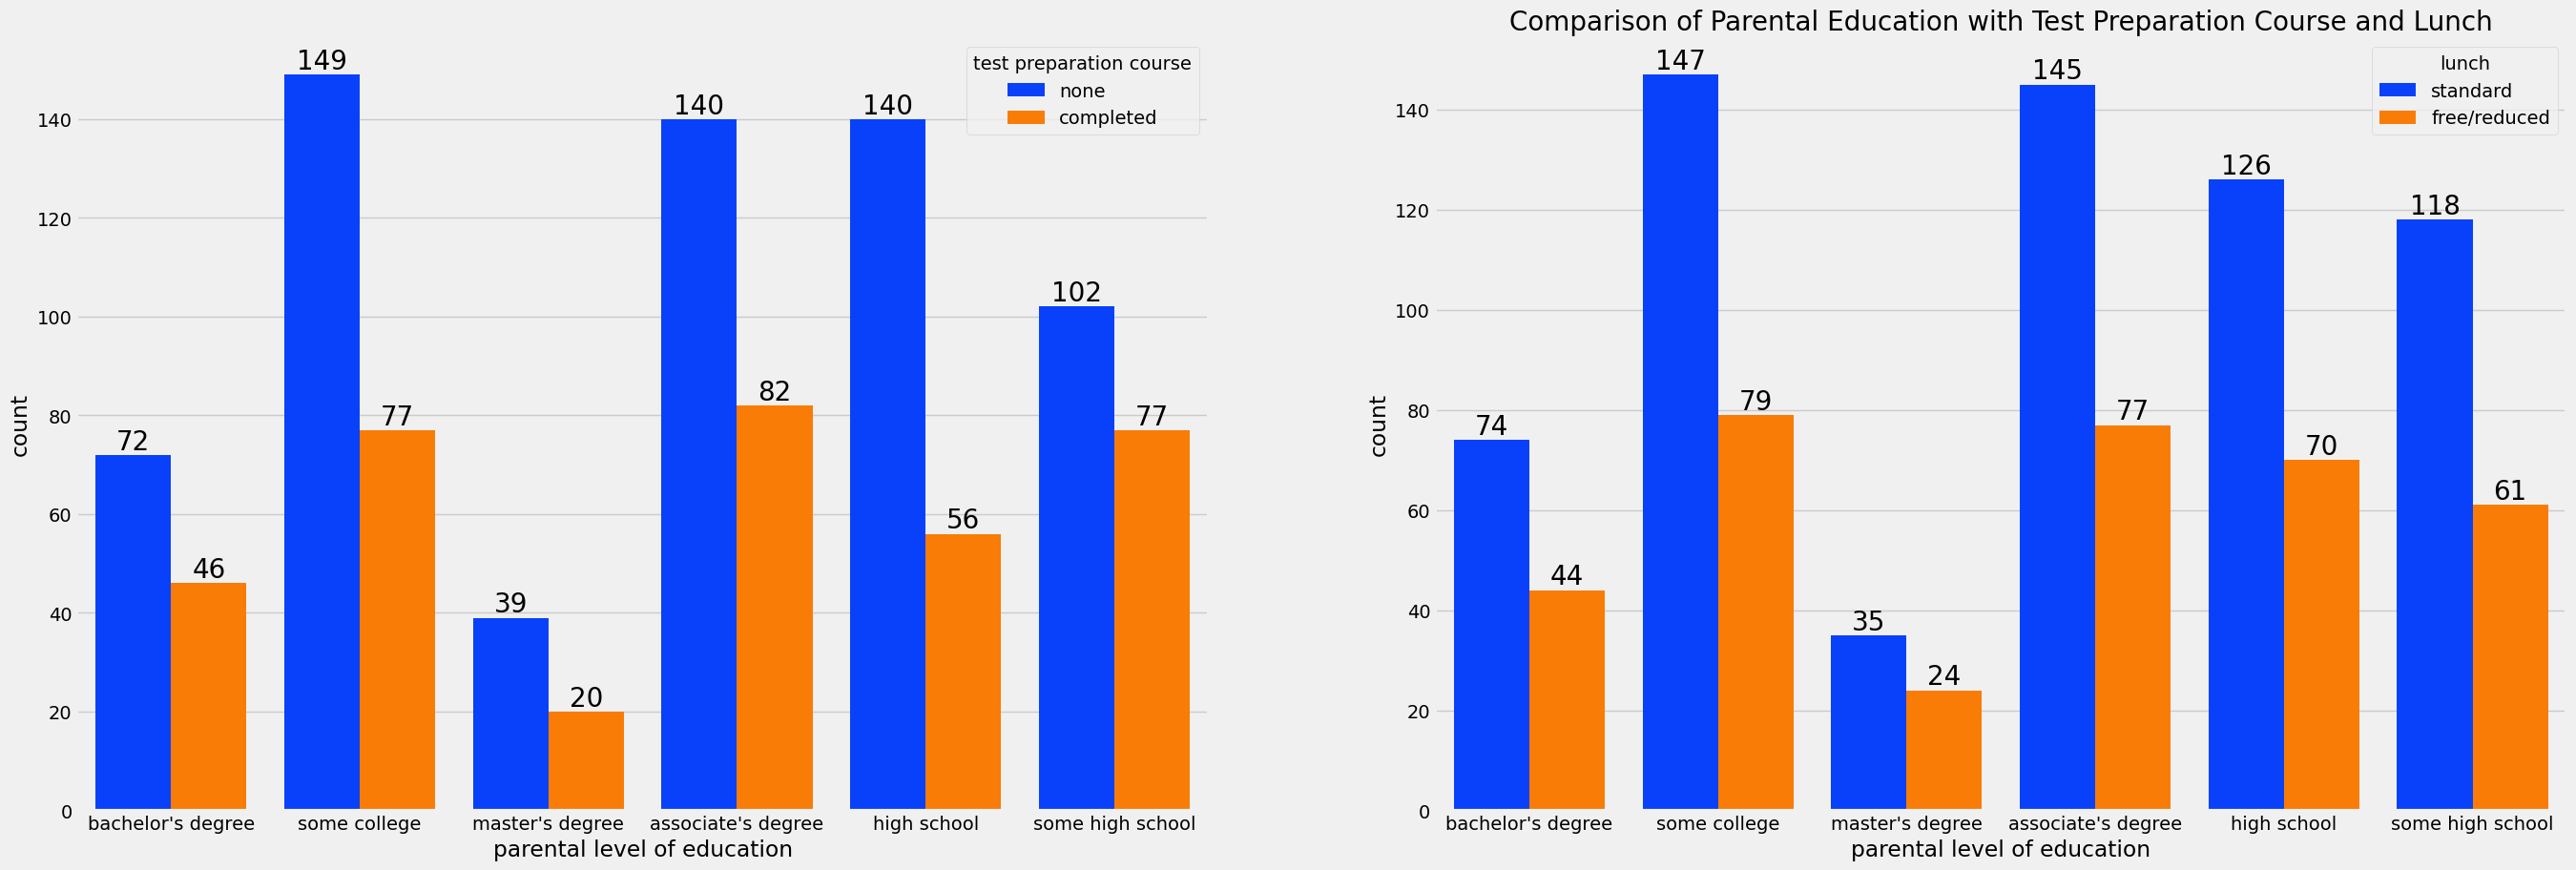

In [50]:
fig , ax = plt.subplots(1 , 2 , figsize = (30 , 10))
sns.countplot(x = df['parental level of education'] , data = df , palette= 'bright' , hue = 'test preparation course' , saturation=0.95 , ax = ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 20)

sns.countplot(x = df['parental level of education'] , data = df , palette= 'bright' , hue = 'lunch' , saturation=0.95 , ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container , color = 'black' , size = 20)

plt.title('Comparison of Parental Education with Test Preparation Course and Lunch' , fontweight = 30 , fontsize = 20)
plt.show()

<Axes: xlabel='lunch', ylabel='writing score'>

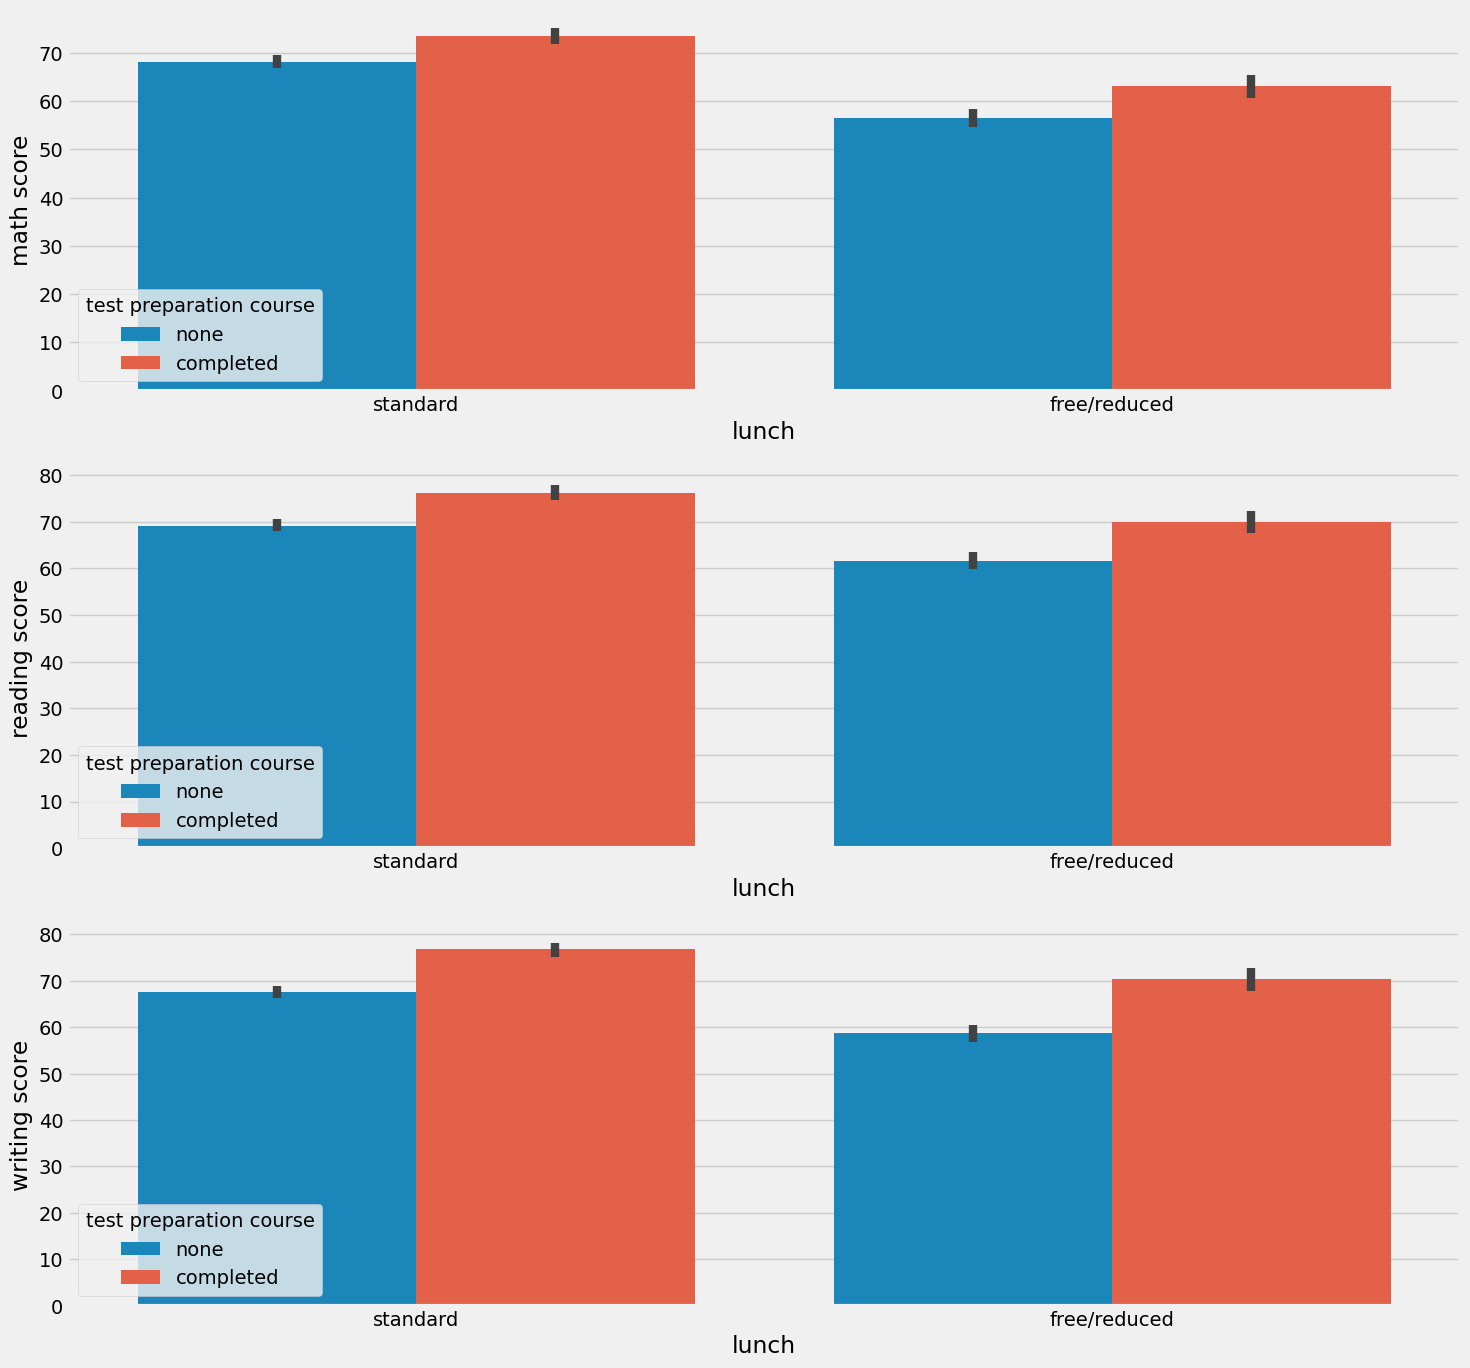

In [62]:
plt.figure(figsize = (16 , 16))
plt.subplot(311)
sns.barplot(x = df['lunch'] , y = df['math score'] , hue = df['test preparation course'])
plt.subplot(312)
sns.barplot(x = df['lunch'] , y = df['reading score'] , hue = df['test preparation course'])
plt.subplot(313)
sns.barplot(x = df['lunch'] , y = df['writing score'] , hue = df['test preparation course'])

Insights:
- Students who have completed test preparation course have higher scores in all the three sections than who haven't taken
- Students consuming standard lunch score more than students taking free lunch

### CHECKING OUTLIERS

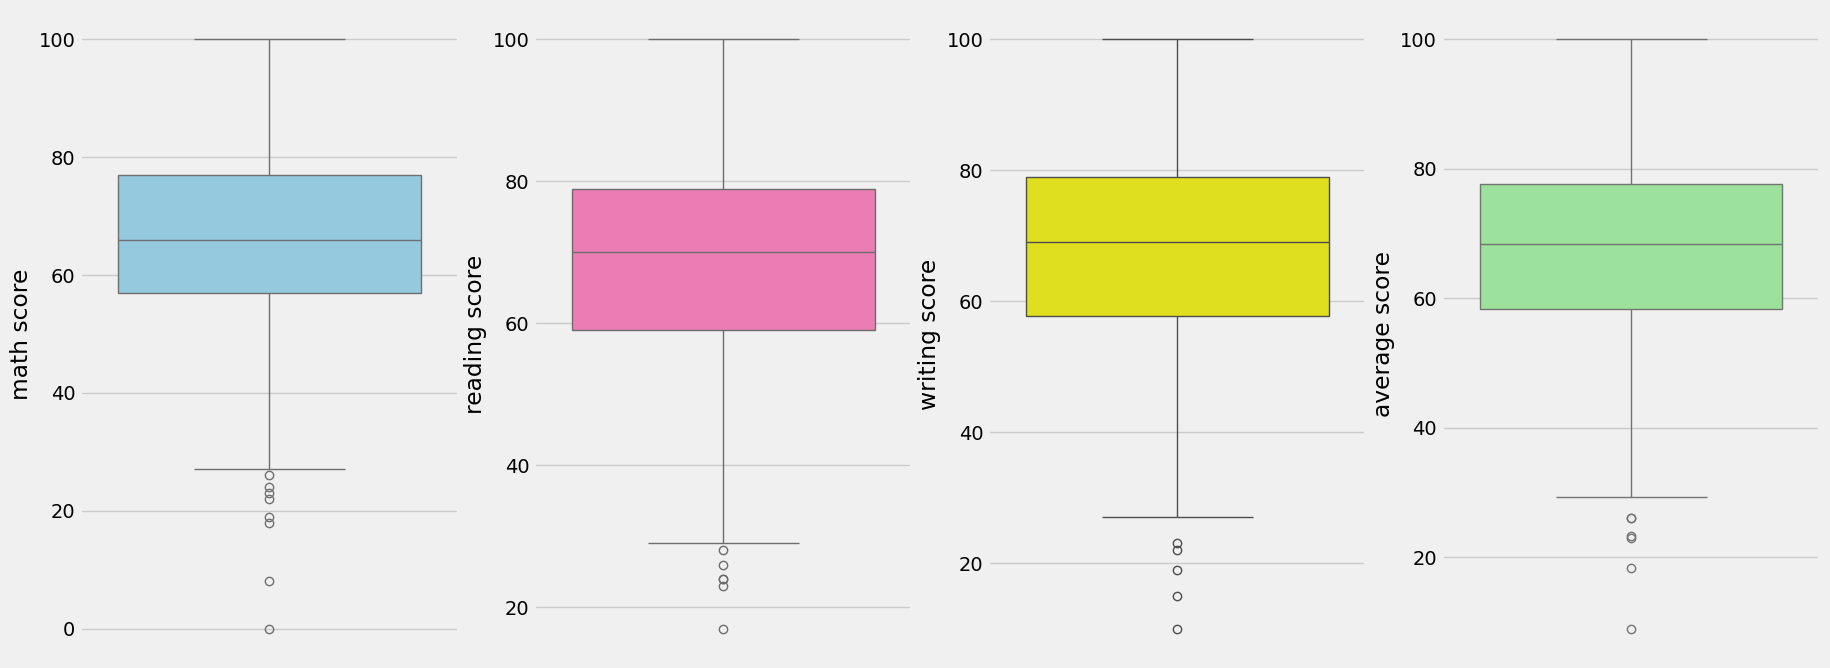

In [66]:
plt.subplots(1,4,figsize=(20,8))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

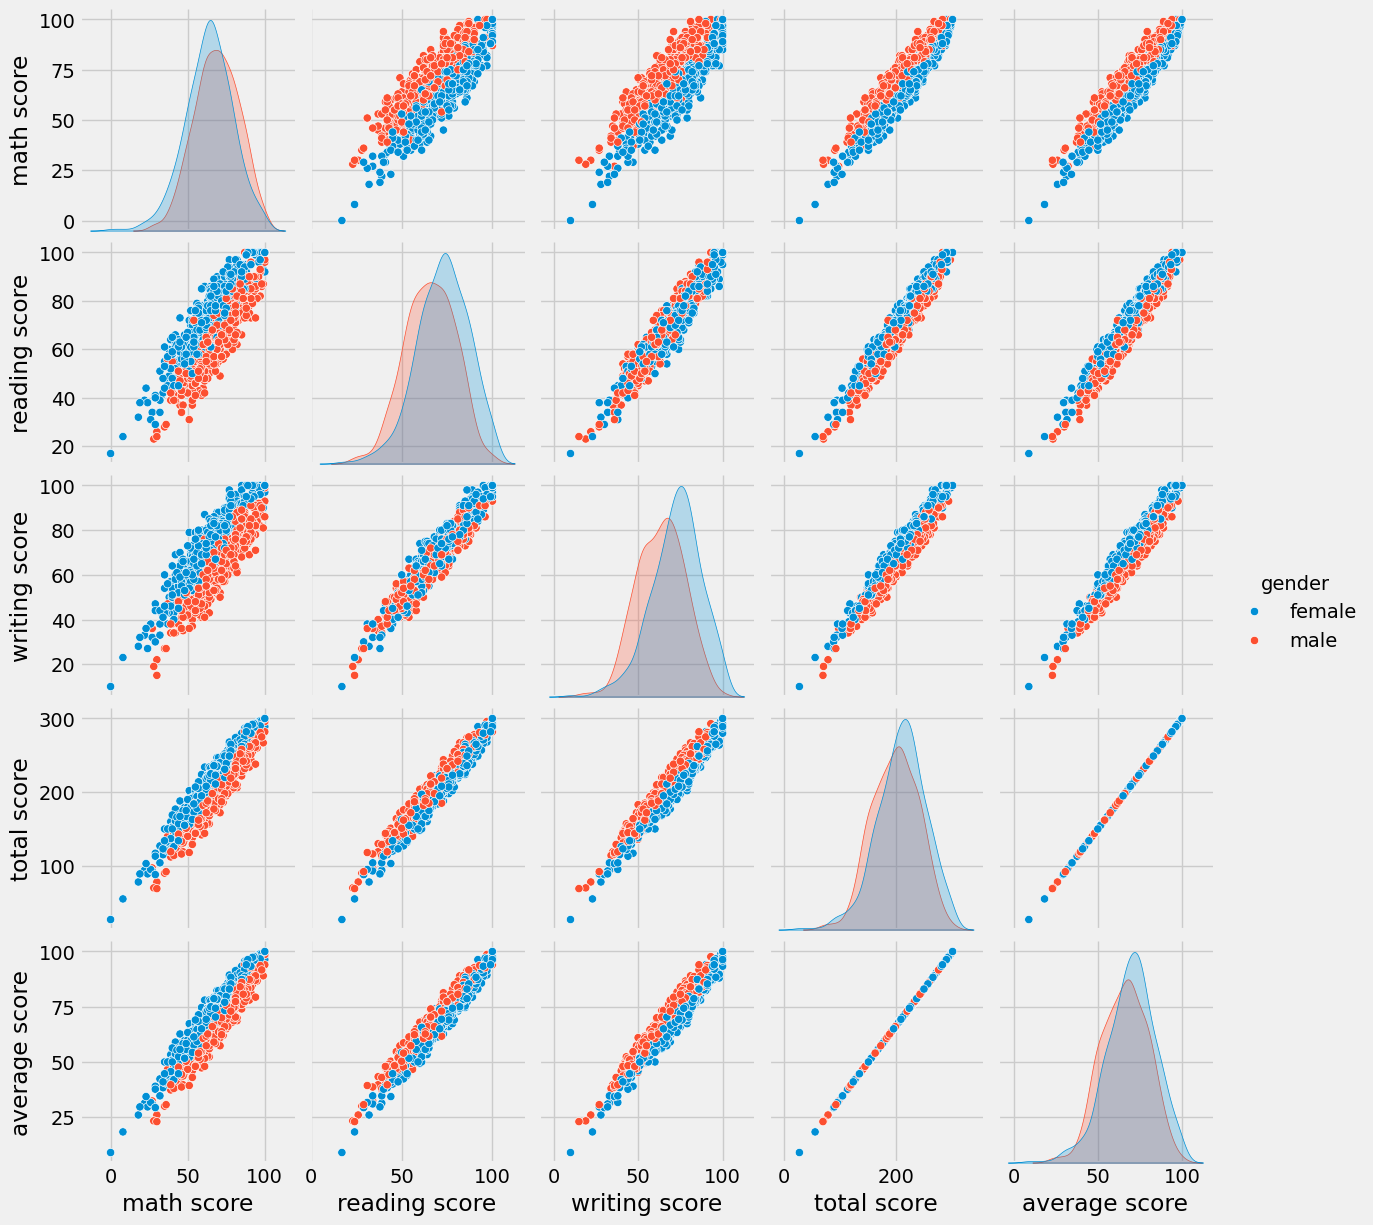

In [67]:
sns.pairplot(df , hue = 'gender')
plt.show()

Insights:
- From the above plots it is clear that all the scores increase linearly with each other

### CONCLUSION

- Student's Performance is related with lunch , race and parental education
- Female's have more pass percentage and are top scores